Создаем датасет.

In [50]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/students_simple.csv')

Выбираем вариант.

In [51]:
N = 22
income = df.iloc[:, N % 5]
test_time = df.iloc[:, ((N ** 2) % 5) + 5]

print(income, test_time)

0     430
1     640
2     610
3     330
4     420
5     290
6     480
7     610
8     840
9     330
10    560
11    450
12    350
13    310
14    380
15    340
16    660
17    450
18    540
19    750
Name: income, dtype: int64 0      8.5
1      6.2
2      6.8
3     12.0
4      7.5
5     10.0
6      7.2
7      4.2
8      3.5
9      9.5
10     7.8
11     8.0
12     6.0
13     4.8
14     8.6
15    10.0
16     4.5
17    12.5
18    10.5
19     6.5
Name: test_time, dtype: float64


# Задание 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

Общая формула корреляции Фехнера

$$
K = \frac{ \sum_{i=1}^{n} [\text{sign}(x_i - \overline{x}) = \text{sign}(y_i - \overline{y})] - [\text{sign}(x_i - \overline{x}) \ne \text{sign}(y_i - \overline{y})] }{n}
$$

Корреляция Фехнера показывает, насколько часто две переменные "двигаются" в одном направлении относительно своих средних значений. Показывает зависимость переменных друг от друга.

In [74]:
# Корреляция Фехнера
def fechner_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_dev = np.array([1 if xi > x_mean else -1 if xi < x_mean else 0 for xi in x])
    y_dev = np.array([1 if yi > y_mean else -1 if yi < y_mean else 0 for yi in y])
    
    same = np.sum(x_dev == y_dev)
    diff = np.sum(x_dev != y_dev)

    return (same - diff) / len(x)

fechner_corr = fechner_correlation(income, test_time)
print(f"Корреляция Фехнера: {fechner_corr:.4f}")

Корреляция Фехнера: -0.4000


Наблюдается умеренная отрицательная связь

• Когда доход выше среднего, время теста ниже среднего

• Когда доход ниже среднего, время теста выше среднего

Коэффициент корреляции Пирсона вычисляется по формуле:
$$
K = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2 \sum_{i=1}^{n} (y_i - \overline{y})^2}}
$$

Корреляция Пирсона дает нам количественную оценку того, насколько сильно и в каком направлении связаны две переменные, позволяя делать статистически обоснованные выводы о линейной зависимости между ними.

In [75]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# Корреляция Пирсона с доверительным интервалом
pearson_corr, pearson_p = pearsonr(income, test_time)

n = len(income)
T = pearson_corr * np.sqrt(n - 2) / np.sqrt(1 - pearson_corr**2)
T_critical = 2.101

print(f"Корреляция Пирсона: {pearson_corr:.4f}")
print("T:", T)
print("Tк:", T_critical)


Корреляция Пирсона: -0.5699
T: -2.9424383169423716
Tк: 2.101


Обнаружена устойчивая умеренная отрицательная связь между доходом и временем выполнения теста - люди с более высоким доходом склонны выполнять тесты быстрее.

In [76]:
spearman_corr, spearman_p = spearmanr(income, test_time)
print(f"Корреляция Спирмена: {spearman_corr:.4f}")

Корреляция Спирмена: -0.5392


Снова наблюдаем заметную обратную корреляцию.

In [77]:
# Корреляция Кенделла
kendall_corr, kendall_p = kendalltau(income, test_time)
print(f"Корреляция Кенделла: {kendall_corr:.4f}")

Корреляция Кенделла: -0.4362


Умеренная обратная корреляция

# 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

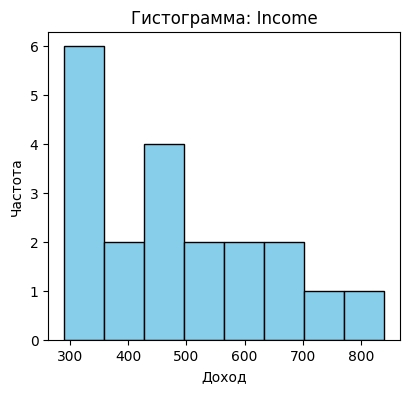

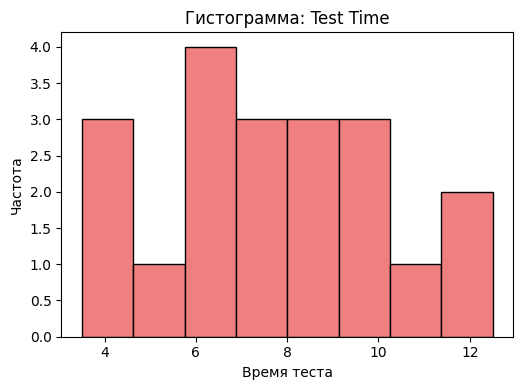

In [56]:
import matplotlib.pyplot as plt

# Гистограмма income
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(income, bins=8, color='skyblue', edgecolor='black')
plt.title('Гистограмма: Income')
plt.xlabel('Доход')
plt.ylabel('Частота')

# Гистограмма test_time
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 2)
plt.hist(test_time, bins=8, color='lightcoral', edgecolor='black')
plt.title('Гистограмма: Test Time')
plt.xlabel('Время теста')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


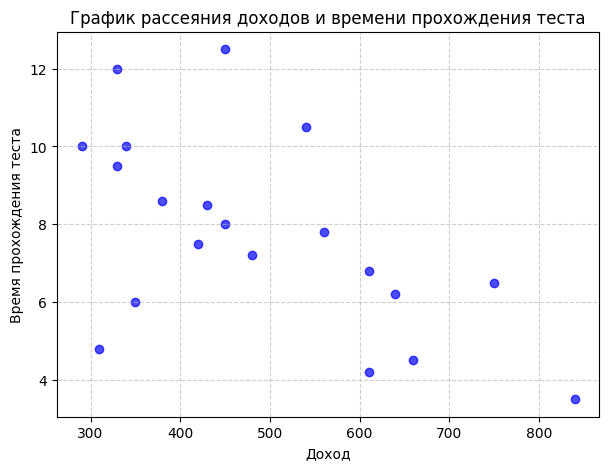

In [57]:
plt.figure(figsize=(7, 5))
plt.scatter(income, test_time, color='blue', alpha=0.7)
plt.title("График рассеяния доходов и времени прохождения теста")
plt.xlabel("Доход")
plt.ylabel("Время прохождения теста")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \overline{y}_i)^2}
$$

In [58]:
# Линейная регрессия

x = income
y = test_time

linear_coef = np.polyfit(x, y, 1)
w1_linear, w0_linear = linear_coef
linear_poly = np.poly1d(linear_coef)
y_linear = linear_poly(x)

print(f"Уравнение: y = {w1_linear:.6f} * x + {w0_linear:.4f}")

# Расчет R²
ss_res_linear = np.sum((y - y_linear) ** 2)
ss_tot_linear = np.sum((y - np.mean(y)) ** 2)
r2_linear = 1 - (ss_res_linear / ss_tot_linear)
print(f"R² = {r2_linear:.4f}")

Уравнение: y = -0.009169 * x + 12.2089
R² = 0.3248


In [59]:
# Квадратичная регрессия
quadratic_coef = np.polyfit(x, y, 2)
w2_quad, w1_quad, w0_quad = quadratic_coef
quadratic_poly = np.poly1d(quadratic_coef)
y_quadratic = quadratic_poly(x)

print(f"Уравнение: y = {w2_quad:.8f} * x² + {w1_quad:.6f} * x + {w0_quad:.4f}")

# Расчет R²
ss_res_quad = np.sum((y - y_quadratic) ** 2)
r2_quadratic = 1 - (ss_res_quad / ss_tot_linear)
print(f"R² = {r2_quadratic:.4f}")

Уравнение: y = -0.00001759 * x² + 0.009697 * x + 7.6017
R² = 0.3542


In [60]:
# Гиперболическая регрессия
x_hyper = 1/x
hyper_coef = np.polyfit(x_hyper, y, 1)
w1_hyper, w0_hyper = hyper_coef
hyper_poly = np.poly1d(hyper_coef)
y_hyper = hyper_poly(x_hyper)

print(f"Уравнение: y = {w1_hyper:.4f}/x + {w0_hyper:.4f}")

# Расчет R²
ss_res_hyper = np.sum((y - y_hyper) ** 2)
r2_hyper = 1 - (ss_res_hyper / ss_tot_linear)
print(f"R² = {r2_hyper:.4f}")

Уравнение: y = 1832.3465/x + 3.6149
R² = 0.2428


In [61]:
# Показательная регрессия

y_log = np.log(y)
exp_coef = np.polyfit(x, y_log, 1)
ln_w1_exp = exp_coef[0]
ln_w0_exp = exp_coef[1]
    
w1_exp = np.exp(ln_w1_exp)
w0_exp = np.exp(ln_w0_exp)
    
y_exponential = w0_exp * (w1_exp ** x)
    
print(f"Уравнение: y = {w0_exp:.4f} * ({w1_exp:.8f})^x")
    
# Расчет R²
ss_res_exp = np.sum((y - y_exponential) ** 2)
r2_exponential = 1 - (ss_res_exp / ss_tot_linear)
print(f"R² = {r2_exponential:.4f}")  


Уравнение: y = 14.1216 * (0.99865437)^x
R² = 0.2880


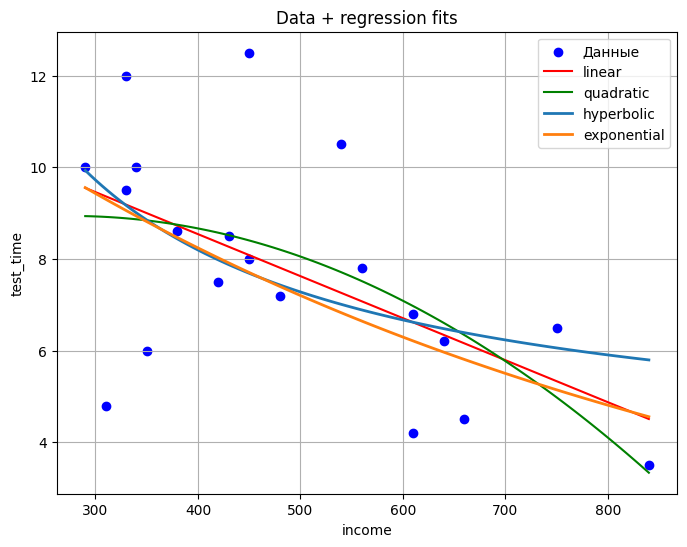

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Данные')

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

y_linear_pred = w1_linear * x_range + w0_linear

y_quadratic_pred = w2_quad * x_range ** 2 + w1_quad * x_range + w0_quad

y_hyper_pred = w1_hyper / x_range + w0_hyper

y_exponential_pred = w0_exp * (w1_exp ** x_range)

plt.plot(x_range, y_linear_pred, label='linear', color='red')

plt.plot(x_range, y_quadratic_pred, label='quadratic', color='green')

plt.plot(x_range, y_hyper_pred, label='hyperbolic', linewidth=2)

plt.plot(x_range, y_exponential_pred, label='exponential', linewidth=2)

plt.legend()
plt.title('Data + regression fits')
plt.xlabel('income')
plt.ylabel('test_time')
plt.grid(True)
plt.show()

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера


$$
F = \frac{R^2}{1-R^2} \cdot \frac{n-k}{k-1}
$$

$k$ — число параметров модели.

* R² показывает качество модели
* F-статистика показывает насколько лучше модель, чем простое среднее
* Fкрит показывает границу, после которой результат считается надежным

In [ ]:
from scipy.stats import f

def f_test_significance(R2, n, k, alpha=0.05, model_name="модель"):
    coef1 = k - 1
    coef2 = n - k 
    
    # F-статистика
    F_stat = (R2 / (1 - R2)) * coef2 / coef1
    
    # Критическое значение
    F_crit = f.ppf(1 - alpha, coef1, coef2)
        
    significant = F_stat >= F_crit
    
    print(f"F-тест для {model_name}:")
    print(f"  R² = {R2:.4f}")
    print(f"  n = {n}, k = {k}")
    print(f"  F = {F_stat:.4f}")
    print(f"  F_crit = {F_crit:.4f}")
    print(f"  Модель {'значима' if significant else 'не значима'}")
    
    return F_stat, F_crit, significant

f_test_significance(r2_quadratic, len(x), 3, model_name="квадратичная")
f_test_significance(r2_hyper, len(x), 2, model_name="квадратичная")

F-тест для квадратичная:
  R² = 0.3542
  n = 20, k = 3
  F = 4.6615
  F_crit = 3.5915
  Модель значима
F-тест для квадратичная:
  R² = 0.2428
  n = 20, k = 2
  F = 5.7709
  F_crit = 4.4139
  Модель значима


(np.float64(5.770903137179296), np.float64(4.413873419170566), np.True_)

Обе модели показывают статистическую значимость.